<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [12.1 2D Plotting](chapter12.01-2D-Plotting.ipynb) | [Contents](Index.ipynb) | [12.3 Working with Maps](chapter12.03-Working-with-Maps.ipynb) >

# 3D Plotting

In order to plot 3D figures use matplotlib, we need to import the *mplot3d* toolkit, which adds the simple 3D plotting capabilities to matplotlib.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

Once we imported the *mplot3d* toolkit, we could create 3D axes and add data to the axes. Let's first create a 3D axes. 

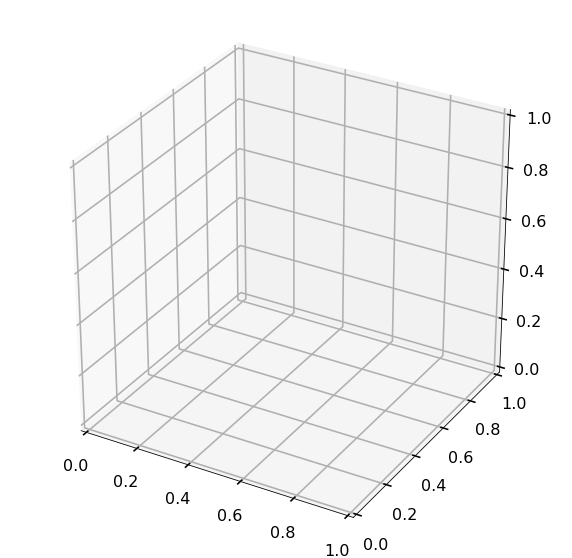

In [2]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
plt.show()

The *ax = plt.axes(projection='3d')* created a 3D axes object, and to add data to it, we could use *plot3D* function. And we could change the title, set the x,y,z labels for the plot as well. 

**TRY IT!** Consider the parameterized data set t is a vector from 0 to $10\pi$ with a step $\pi/50$, x = sin(t), and y = cos(t). Make a three-dimensional plot of the (x,y,t) data set using *plot3*. Turn the grid on, make the axis equal, and put axis labels and a title. Let's also activate the interactive plot using *%matplotlib notebook*, so that you can move and rotate the figure as well. 

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


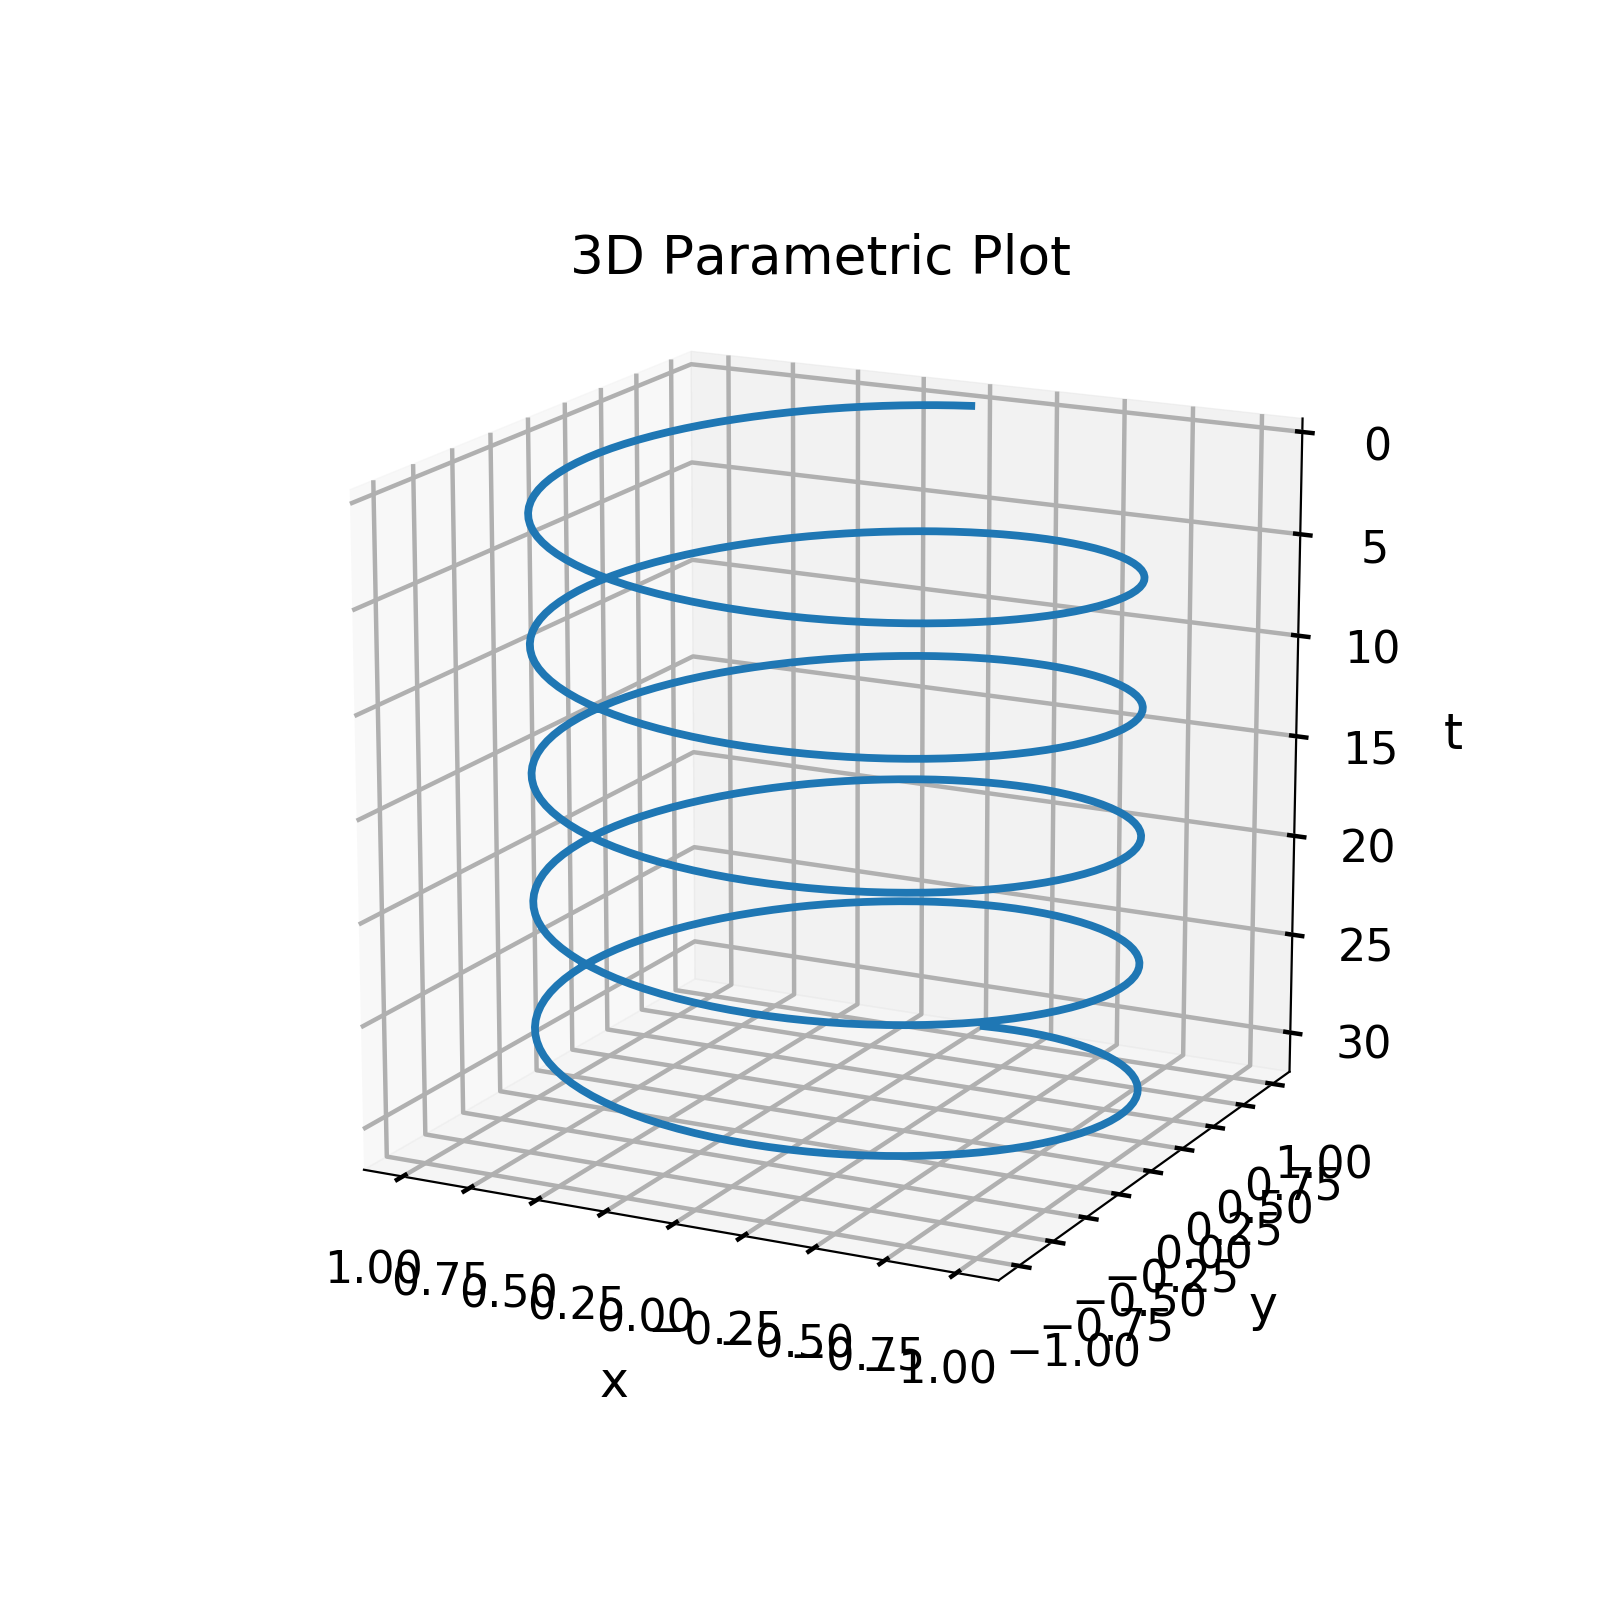

In [4]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

Try to rotate the above figure, and get a 3D view of the plot. You may notice that we also set the *labelpad=20* to the 3-axis labels, which will make the label not overlap with the tick texts. 

We could also plot 3D scatter plot using *scatter* function. 

**TRY IT!** Make a 3D scatter plot with randomly generate 50 data points for x, y, and z. Set the point color as red, and size of the point as 50. 

In [5]:
# We can turn off the interactive plot using %matplotlib inline
%matplotlib inline

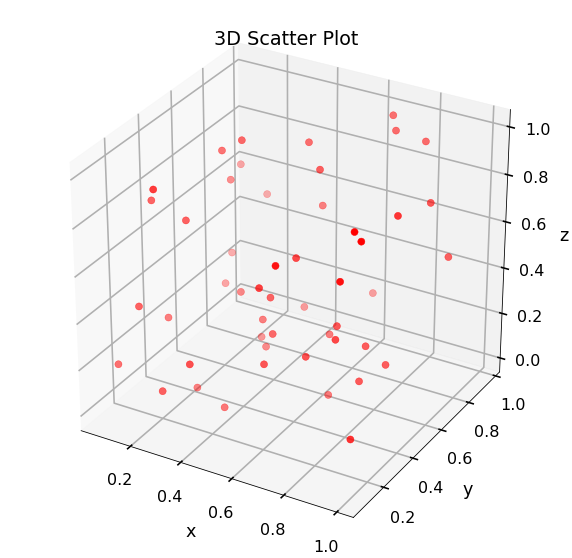

In [6]:
x = np.random.random(50)
y = np.random.random(50)
z = np.random.random(50)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

Many times we would like a surface plot rather than a line plot when plotting in three dimensions. In three-dimensional surface plotting, we wish to make a graph of some relationship *f (x, y)*. In surface plotting all (x,y) pairs must be given. This is not straightforward to do using vectors. Therefore, in surface plotting, the first data structure you must create is called a mesh. Given lists/arrays of x and y values, a mesh is a listing of all the possible combinations of x and y. In Python, the mesh is given as two arrays X and Y where X (i,j) and Y (i,j) define possible (x,y) pairs. A third array, Z, can then be created such that Z (i,j) = f (X (i,j), Y (i,j)). A mesh can be created using the *np.meshgrid* function in Python. The *meshgrid* function has the inputs x and y are lists containing the independent data set. The output variables X and Y are as described earlier.

**TRY IT!** Create a mesh for x = [1, 2, 3, 4] and y = [3, 4, 5] using the *meshgrid* function. 

In [7]:
x = [1, 2, 3, 4]
y = [3, 4, 5]

X, Y = np.meshgrid(x, y)
print(X)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [8]:
print(Y)

[[3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]]


We could plot 3D surfaces in Python too, the function to plot the 3D surfaces is *plot_surface(X,Y,Z)*, where X and Y are the output arrays from *meshgrid*, and $Z = f (X,Y)$ or $Z (i,j) = f (X (i,j),Y (i,j))$. The most common surface plotting functions are surf and contour.

**TRY IT!** Make a plot of the surface $f(x,y) = sin(x)\cdot cos(y) for -5\le x\le5, -5\le y\le5$ using the *plot_surface* function. Take care to use a sufficiently fine discretization in x and y to make the plot look smooth. 

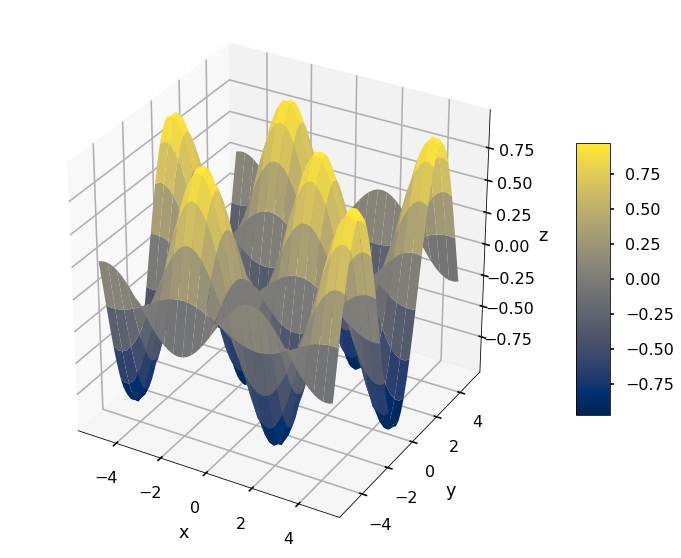

In [9]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

You will notice that the surface plot shows different colors for different elevations, yellow for higher and blue for lower, since we used the colormap *plt.cm.cividis* in the surface plot. You can change to different color schemes for the surface plot. These are left as exercises. We also plotted a colorbar to show the corresponding colors to different values. 

We could have subplots of different 3D plots as well. We could use the *add_subplot* function from the figure object we created to generate the subplots for 3D cases. 

'
**TRY IT!** Make a 1 by 2 subplot to plot the above X, Y, Z data in wireframe plot and surface plot. 

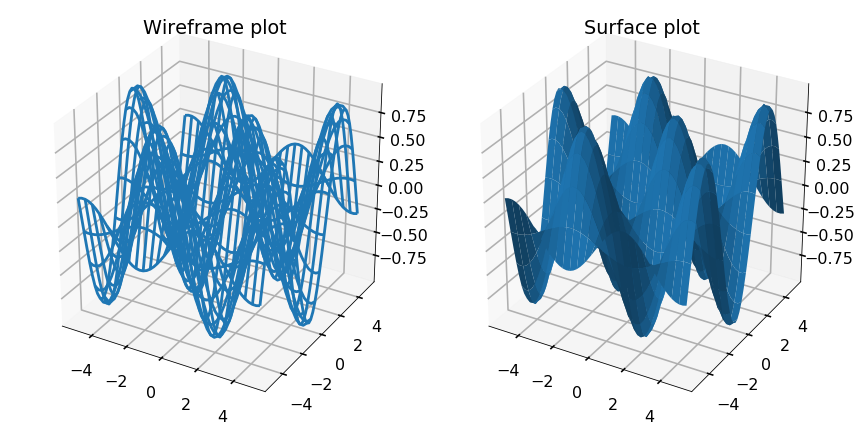

In [10]:
fig = plt.figure(figsize=(12,6))


ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_title('Wireframe plot')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title('Surface plot')

plt.tight_layout()

plt.show()

There are many more functions related to plotting in Python and this is in no way an exhaustive list. However, it should be enough to get you started so that you can find the plotting functions in Python that suit you best and provide you with enough background to learn how to use them when you encounter them. You can find more examples of  different type 3D plots on the [mplot3d tutorial website](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). 

<!--NAVIGATION-->
< [12.1 2D Plotting](chapter12.01-2D-Plotting.ipynb) | [Contents](Index.ipynb) | [12.3 Working with Maps](chapter12.03-Working-with-Maps.ipynb) >